In [618]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as R2

In [606]:
# Read .csv file from direction by pandas.read_csv
df = pd.read_csv('D:\workplace\ML\linear_regression\Student_Performance.csv')
# Show data
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [607]:
# Count the number of null values in each column
cntNULL = df.isna().sum()
cntNULL

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

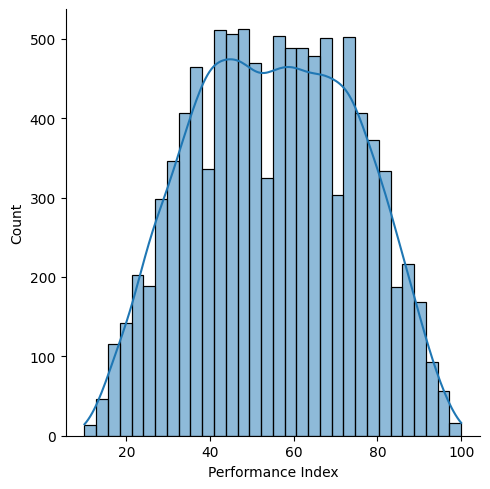

In [608]:
sns.displot(df['Performance Index'], kde=True)

In [609]:
# Display the statistic summary
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [610]:
# Display the concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [611]:
# # One-hot encoding for 'Extracurricular Activities' column
# encoded_df = pd.get_dummies(df, columns=['Extracurricular Activities'], dtype=float , drop_first=1)

# encoded_df = np.array(encoded_df)
# nor_scaler = MinMaxScaler()
# encoded_df[:,0:4] = nor_scaler.fit_transform(encoded_df[:,0:4])

# std_scaler = StandardScaler()
# encoded_df[:,0:4] = std_scaler.fit_transform(encoded_df[:,0:4])

In [612]:
# One-hot encoding for 'Extracurricular Activities' column
encoded_df = pd.get_dummies(df, columns=['Extracurricular Activities'], dtype=float , drop_first=1)

# Define feature values and target values
X = encoded_df.drop(columns='Performance Index') # Matrix
y = encoded_df['Performance Index'] # Vector

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21522832)

GRADIENT DESCENT

![Alt text](image.png)

In [613]:
# Built the model
class LR:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self,X,y): # Override
        pass
 
    def predict(self, X): # Inherited
        return X.dot(self.weights) + self.bias


In [614]:
class GradientDescent_LR(LR):
    def __init__(self, lr=0.01, max_iter=200, random_state=21522832):
        super().__init__()
        self.lr = lr                        # Learning rate
        self.max_iter = max_iter            # Max iteration
        self.random_state = random_state
        self.cost_trend = []                # Visualize the cost/loss function

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)  # Set the seed for the random generator of Numpy
        weights = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1] + 1) # Create a random weight vector by normal distribution
        self.weights = weights[1:]
        self.bias = weights[0]
        self.cost_trend = [] 

        for _ in range(self.max_iter):
            y_predict = self.predict(X)             # Calculate the y value with the weights vector after updating
            diff = y - y_predict                    # Difference vector of the predicted y and target y vectors 
            self.bias += 1/(X.shape[0]) * self.lr * np.sum(diff) 
            self.weights += 1/(X.shape[0]) * self.lr * X.T.dot(diff)
            L = 1/(X.shape[0]) * np.sum(diff ** 2)             # Loss function (Residual Sum of Squares - RSS)
            self.cost_trend.append(L)               # Add into the cost_trend to visualize

In [617]:
reg_GD = GradientDescent_LR(lr = 1e-5, max_iter = 200, random_state = 42)
reg_GD.fit(X_train,y_train)
reg_GD.weights

Hours Studied                       0.080134
Previous Scores                     0.794620
Sleep Hours                         0.075267
Sample Question Papers Practiced    0.041382
Extracurricular Activities_Yes      0.002450
dtype: float64

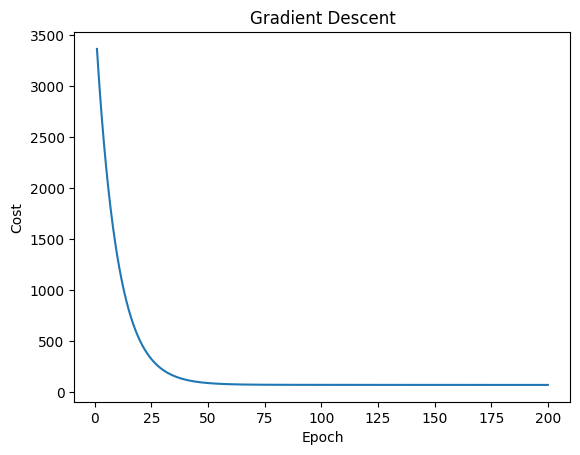

In [616]:
plt.plot(range(1,len(reg_GD.cost_trend) + 1), reg_GD.cost_trend)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [619]:
y_pred_GD = reg_GD.predict(X_test)
print('R2 of GD: ', round(R2(y_test,y_pred_GD),6))

R2 of GD:  0.806391
